# Exercise 1: Classification
## Dataset: Breast Cancer

### Import libriaries

In [673]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [674]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [675]:
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("scikit-learn version:", sklearn.__version__)

import platform
print(platform.system()) 
print(platform.version())

import sys
print(sys.version)


pandas version: 2.1.4
numpy version: 1.26.4
matplotlib version: 3.8.0
seaborn version: 0.13.2
scikit-learn version: 1.2.2
Darwin
Darwin Kernel Version 22.1.0: Sun Oct  9 20:14:30 PDT 2022; root:xnu-8792.41.9~2/RELEASE_ARM64_T8103
3.11.7 (main, Dec 15 2023, 12:09:04) [Clang 14.0.6 ]


### Load data

In [676]:
df_train = pd.read_csv('/Users/arturdobrynin/Desktop/Semester 2/ML/HW1/Breast Cancer/breast-cancer-diagnostic.shuf.lrn.csv', sep=',')
df_test = pd.read_csv('/Users/arturdobrynin/Desktop/Semester 2/ML/HW1/Breast Cancer/breast-cancer-diagnostic.shuf.tes.csv', sep = ',')
df_solution = pd.read_csv('/Users/arturdobrynin/Desktop/Semester 2/ML/HW1/Breast Cancer/breast-cancer-diagnostic.shuf.sol.ex.csv', sep = ',')

In [677]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

In [678]:
df_train

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,886452,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
1,84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
2,9012795,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
3,894326,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
4,867387,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,911150,False,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
281,857156,False,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917
282,8910251,False,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
283,8910499,False,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.1453,0.06189,0.2446,0.07024


In [679]:
df_test

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.1362,0.08178,0.2487,0.06766
1,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
2,8813129,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.1786,0.09678,0.2506,0.07623
3,881094802,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
4,88350402,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,9010598,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238
280,862485,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
281,8910506,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062
282,8812877,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640


In [680]:
df_solution

,ID,class
0,9012568,False
1,844981,False
2,8813129,False
3,881094802,False
4,88350402,False
...,...,...
279,9010598,False
280,862485,False
281,8910506,False
282,8812877,False


In [681]:
true_false_counts = df_solution['class'].value_counts()
print(true_false_counts)

class
False    284
Name: count, dtype: int64


### Basic data exploration

In [682]:
df_train.info() # all attributes are numerical with float64 datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      285 non-null    int64  
 1   class                   285 non-null    bool   
 2   radiusMean              285 non-null    float64
 3   textureMean             285 non-null    float64
 4   perimeterMean           285 non-null    float64
 5   areaMean                285 non-null    float64
 6   smoothnessMean          285 non-null    float64
 7   compactnessMean         285 non-null    float64
 8   concavityMean           285 non-null    float64
 9   concavePointsMean       285 non-null    float64
 10  symmetryMean            285 non-null    float64
 11  fractalDimensionMean    285 non-null    float64
 12  radiusStdErr            285 non-null    float64
 13  textureStdErr           285 non-null    float64
 14  perimeterStdErr         285 non-null    fl

### Checking for missing values

In [683]:
df_train.isnull().sum() # there are no missing values

ID                        0
class                     0
radiusMean                0
textureMean               0
perimeterMean             0
areaMean                  0
smoothnessMean            0
compactnessMean           0
concavityMean             0
concavePointsMean         0
symmetryMean              0
fractalDimensionMean      0
radiusStdErr              0
textureStdErr             0
perimeterStdErr           0
areaStdErr                0
smoothnessStdErr          0
compactnessStdErr         0
concavityStdErr           0
concavePointsStdErr       0
symmetryStdErr            0
fractalDimensionStdErr    0
radiusWorst               0
textureWorst              0
perimeterWorst            0
areaWorst                 0
smoothnessWorst           0
compactnessWorst          0
concavityWorst            0
concavePointsWorst        0
symmetryWorst             0
fractalDimensionWorst     0
dtype: int64

### Checking for outliers

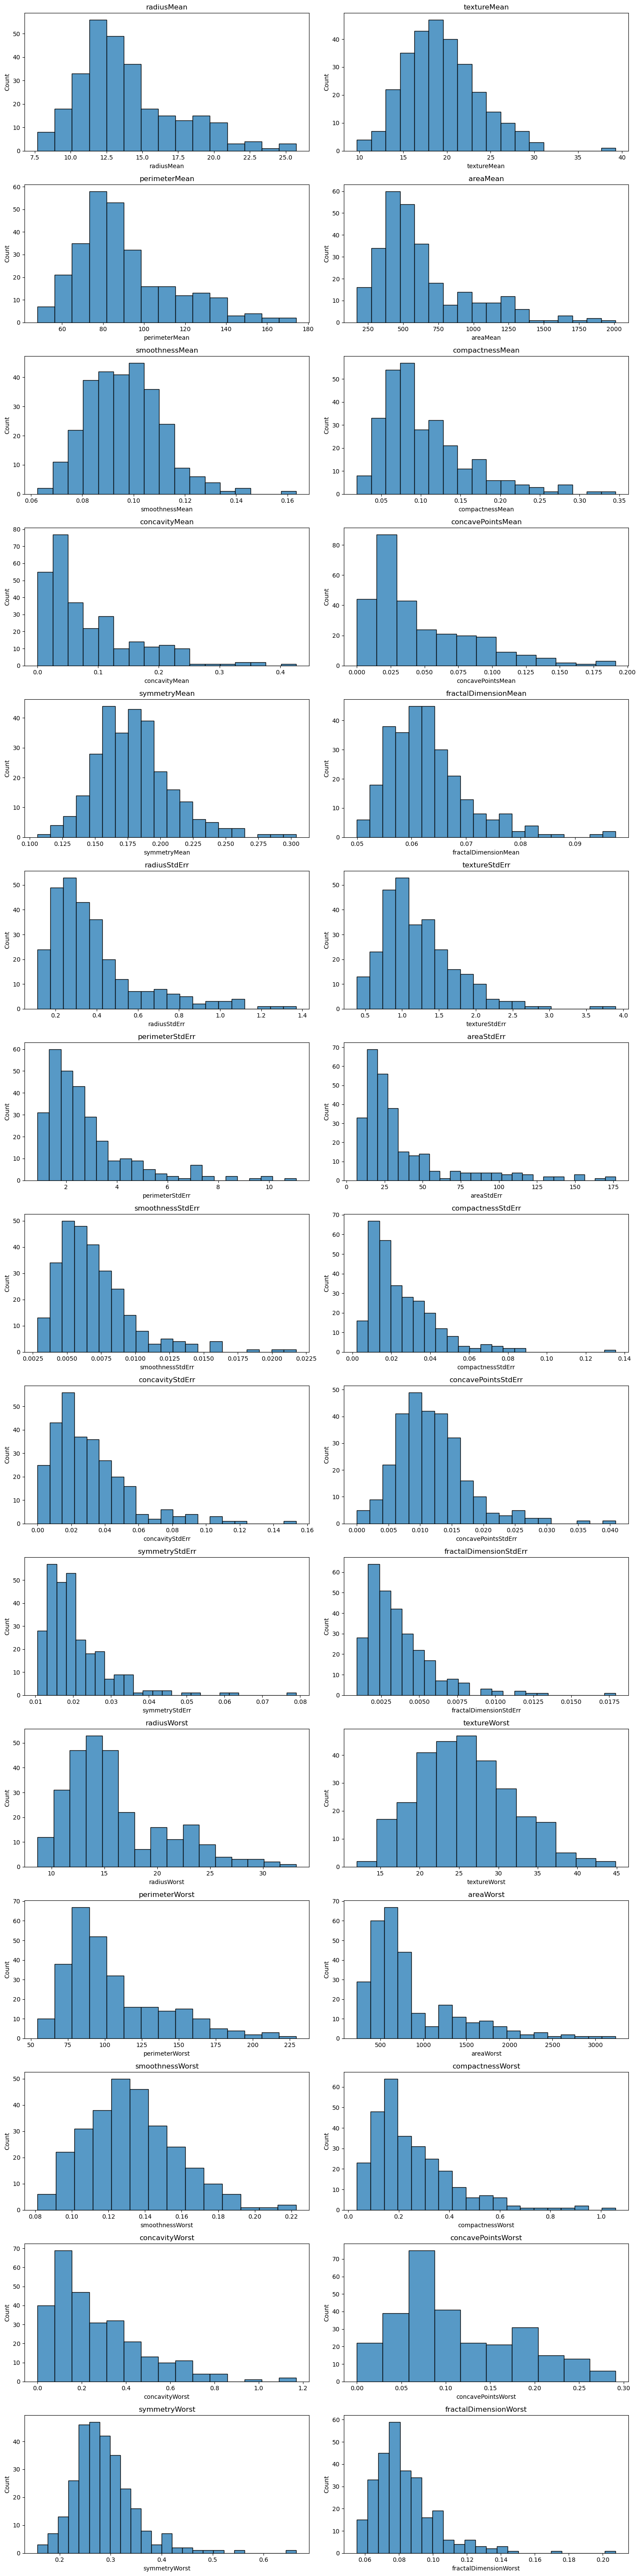

In [684]:
# there are outliers, but as the dataset consists only of 285 row, we will not remove them

numeric_columns = df_train.select_dtypes(include=[float]).columns

num_columns = 2
num_rows = (len(numeric_columns) + 1) // num_columns

plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(x=df_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Overall, train dataset has 285 rows and 32 columns, while test dataset has 284 rows and 31 columns.
There are only numerical attributes with boolean target variable and no missing values. However, from the histograms it can be seen, that the dataset has several outliers. We will not remove them as the dataset has only 285 rows and it can result in the loss of valuable information, which will impact the results of analysis or modeling.

### Target variable

The class to predict is binary. Target variable takes boolean values ​​of True (there is a cancer) or False (there is no cancer).

In [685]:
df_train['class'].value_counts()

class
False    188
True      97
Name: count, dtype: int64

Data has an unbalanced distribution of classes (188 objects of class False and 97 objects of class True). This may affect the quality of the model, as the algorithm may be biased towards predicting the dominant class (in our case, False), resulting in high accuracy but poor ability to predict the less represented class (True).

### Checking the correlation

In [686]:
df_correlation = df_train.copy()
df_correlation = df_correlation.drop(['ID', 'class'], axis = 1)

<Axes: >

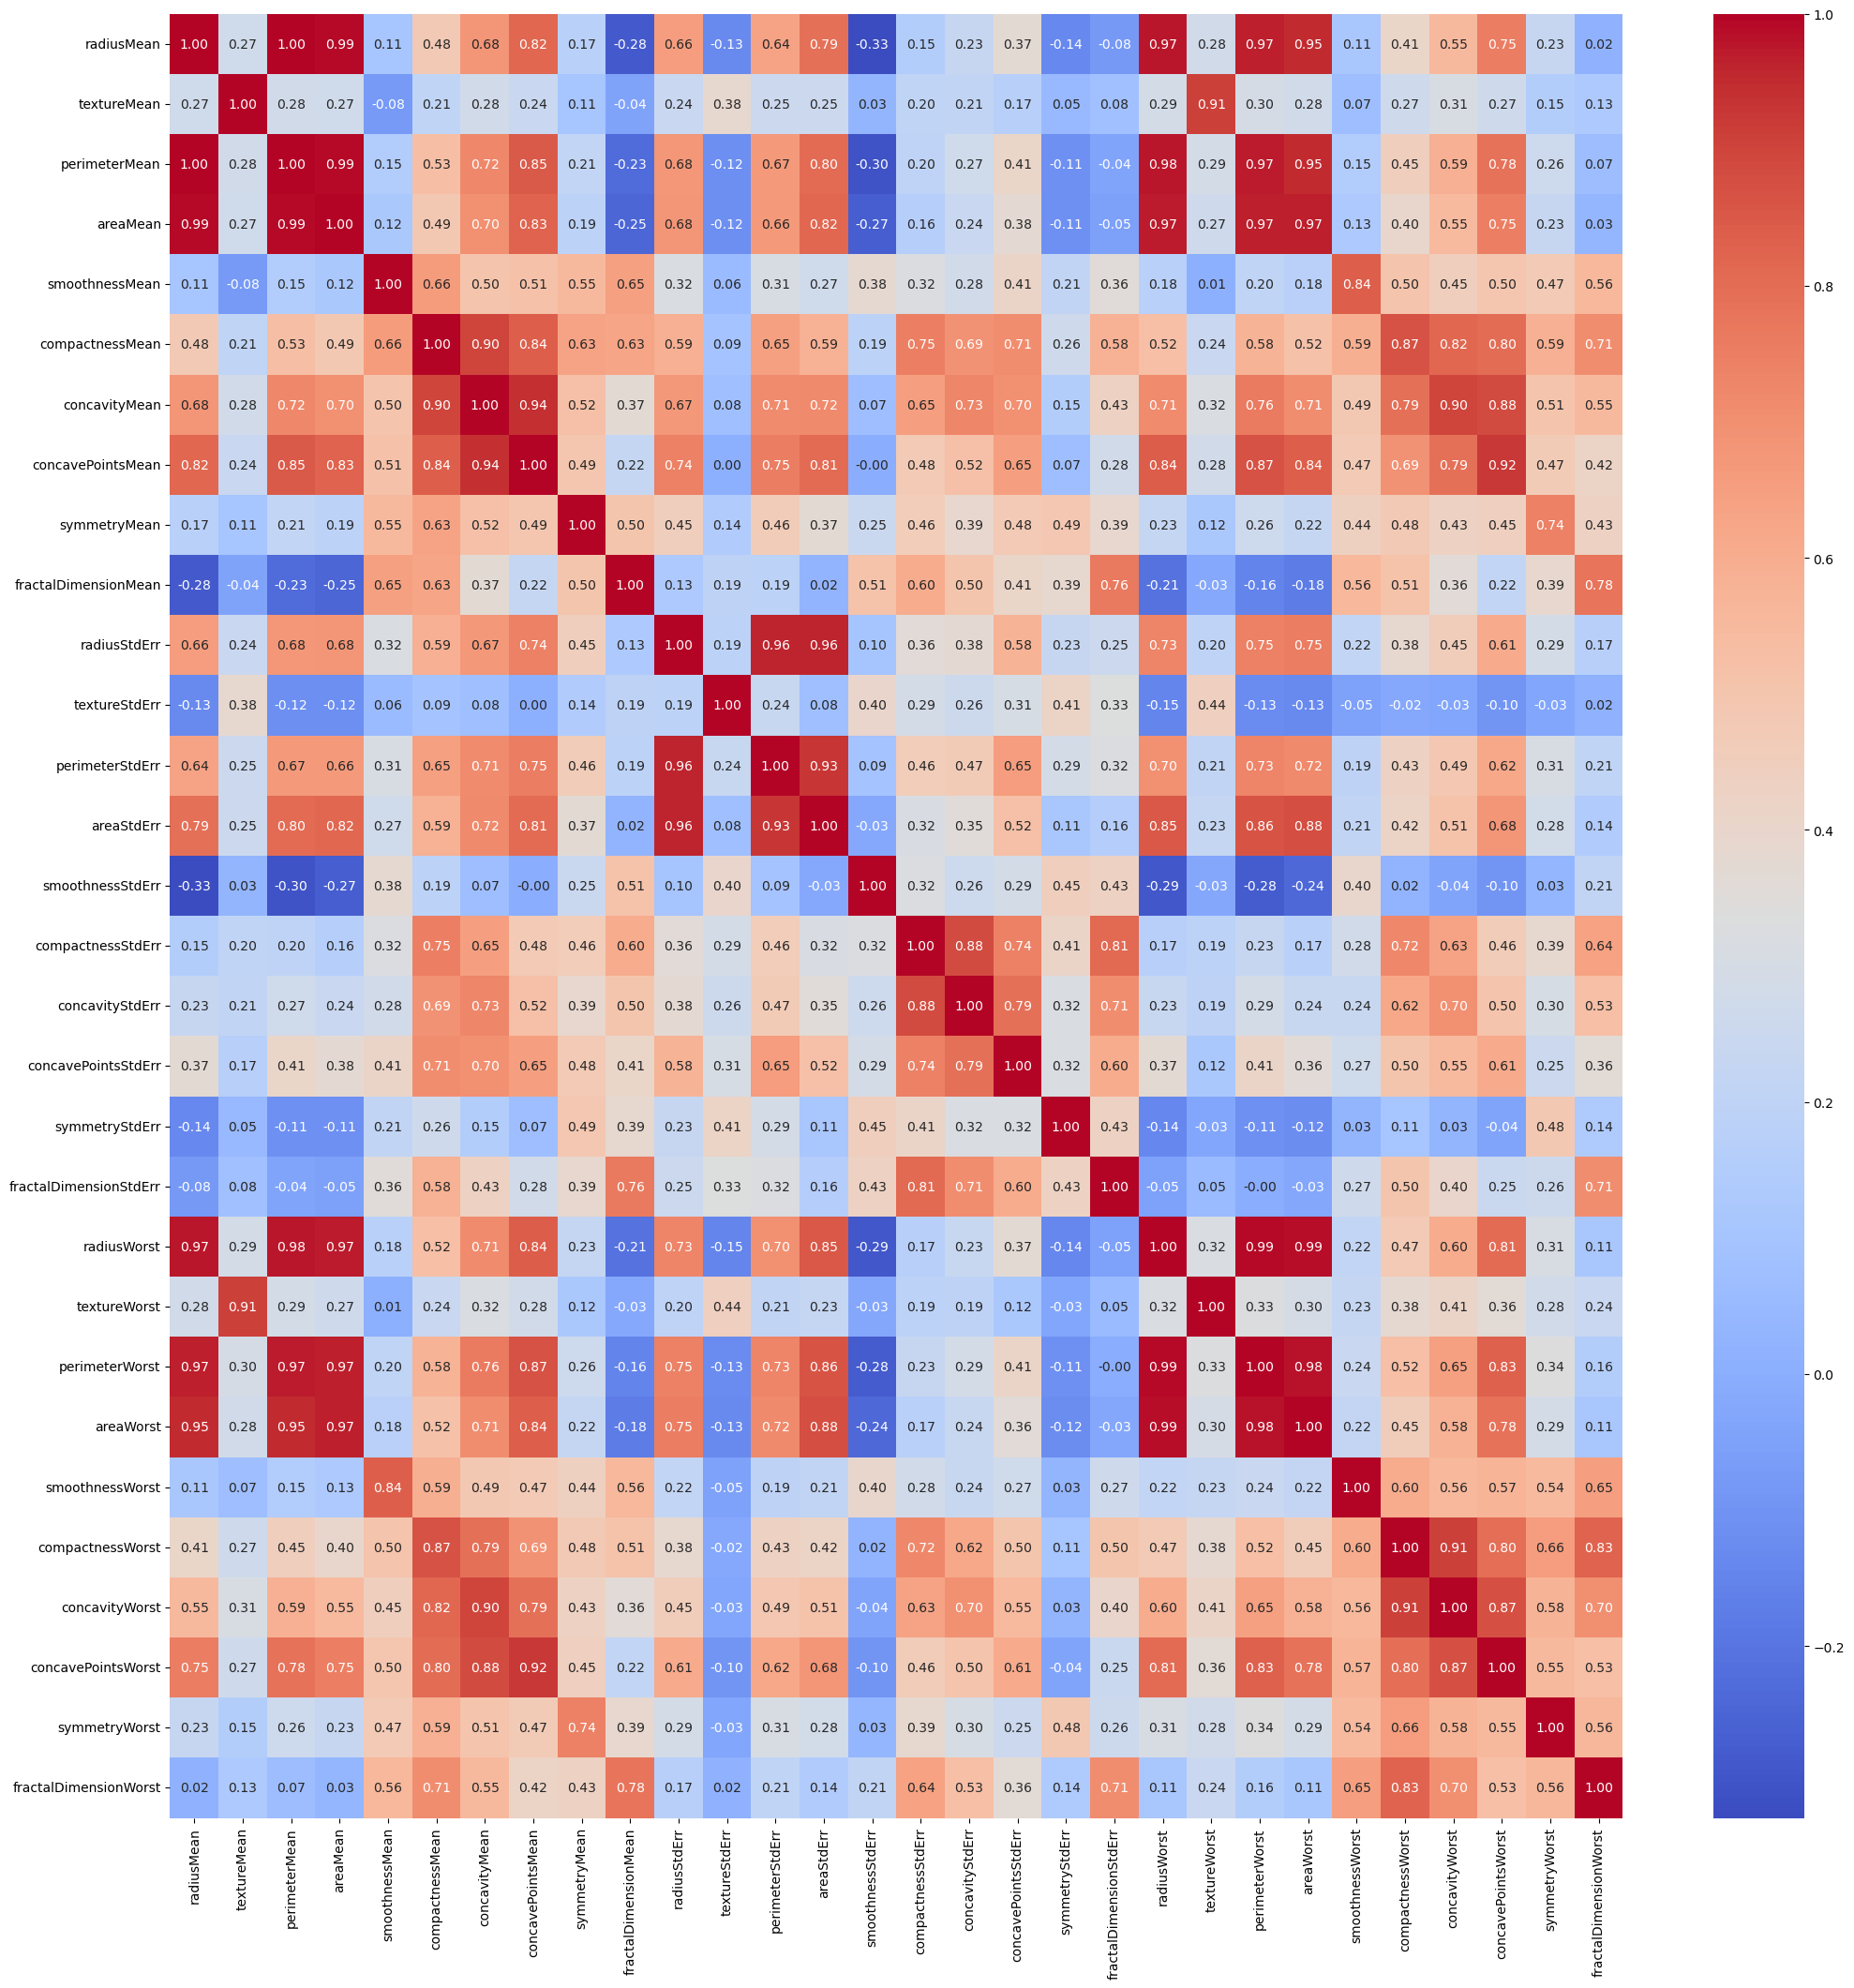

In [687]:
# from the heatmap it is seen that some variables have high correlation and we could exclude them
corr = df_correlation.corr(numeric_only=True)
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

### Data preprocessing

There are no missing values, but several outliers in the dataset and some highly correlated features.
However, firstly we will try to run models with the given dataset without removing or changing these data as we have only 286 samples and the data is medical data and outliers can be useful as high values ​​of a feature may indicate serious abnormalities (tumor, disease). 

After we will try to handle these features to see how it affects models.

In [688]:
df_train.columns

Index(['ID', 'class', 'radiusMean', 'textureMean', 'perimeterMean', 'areaMean',
       'smoothnessMean', 'compactnessMean', 'concavityMean',
       'concavePointsMean', 'symmetryMean', 'fractalDimensionMean',
       'radiusStdErr', 'textureStdErr', 'perimeterStdErr', 'areaStdErr',
       'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr',
       'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr',
       'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst',
       'smoothnessWorst', 'compactnessWorst', 'concavityWorst',
       'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst'],
      dtype='object')

In [689]:
# drop target column from the train dataset and ID column as we don't need it for model
X_train = df_train.drop(['class', 'ID'], axis = 1)
y_train = df_train['class']

X_test = df_test.copy()
X_test = X_test.drop(['ID'], axis = 1)

As we are going to use classifiers which a sensitive to scale, we use StandartScaler

In [690]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_test_scaled.columns = X_test.columns

Check the results before and after normalization

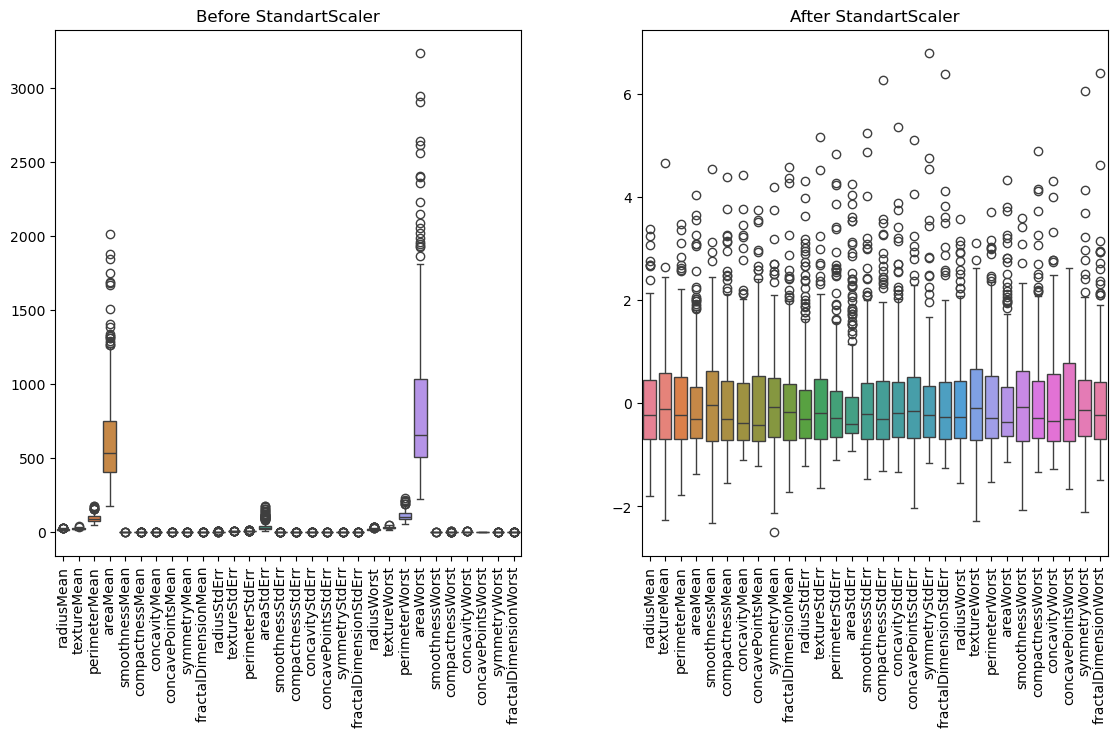

In [691]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("Before StandartScaler")

sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title("After StandartScaler")
plt.tight_layout()

for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

### Logistic Regression 
Simple and interpretable model, works well on small datasets

In [692]:
log_reg = LogisticRegression()

In [693]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [694]:
y_pred_log_reg = cross_val_predict(log_reg, X_train_scaled, y_train, cv=50)

In [695]:
# Metrics to check the effectiveness of model
accuracy_log_reg = accuracy_score(y_train, y_pred_log_reg)
precision_log_reg = precision_score(y_train, y_pred_log_reg)
recall_log_reg = recall_score(y_train, y_pred_log_reg)
f1_log_reg = f1_score(y_train, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_train, y_pred_log_reg)
confusion_log_reg = confusion_matrix(y_train, y_pred_log_reg)

print('Accuracy Score:', accuracy_log_reg)
print('Precision Score:', precision_log_reg)
print('Recall:', recall_log_reg)
print('f1_score:', f1_log_reg)
print('roc_auc:', roc_auc_log_reg)
confusion_log_reg

Accuracy Score: 0.9859649122807017
Precision Score: 1.0
Recall: 0.9587628865979382
f1_score: 0.9789473684210526
roc_auc: 0.9793814432989691


array([[188,   0],
       [  4,  93]])

As there exists data disbalance, we can try to handle it and look for the results

In [696]:
#data balancing
sm= SMOTE()

In [697]:
sm_x_train,sm_y_train = sm.fit_resample(X_train_scaled, y_train)

In [698]:
sm_y_train.value_counts()

class
True     188
False    188
Name: count, dtype: int64

Running log reg model once again

In [699]:
log_reg.fit(sm_x_train, sm_y_train)
y_pred_log_reg_sm = cross_val_predict(log_reg, sm_x_train, sm_y_train, cv=50)

# Metrics to check the effectiveness of model
accuracy_log_reg_sm = accuracy_score(sm_y_train, y_pred_log_reg_sm)
precision_log_reg_sm = precision_score(sm_y_train, y_pred_log_reg_sm)
recall_log_reg_sm = recall_score(sm_y_train, y_pred_log_reg_sm)
f1_log_reg_sm = f1_score(sm_y_train, y_pred_log_reg_sm)
roc_auc_log_reg_sm = roc_auc_score(sm_y_train, y_pred_log_reg_sm)
confusion_log_reg_sm = confusion_matrix(sm_y_train, y_pred_log_reg_sm)

print('Accuracy Score:', accuracy_log_reg_sm)
print('Precision Score:', precision_log_reg_sm)
print('Recall:', recall_log_reg_sm)
print('f1_score:', f1_log_reg_sm)
print('roc_auc:', roc_auc_log_reg_sm)
confusion_log_reg_sm

Accuracy Score: 0.9867021276595744
Precision Score: 1.0
Recall: 0.973404255319149
f1_score: 0.986522911051213
roc_auc: 0.9867021276595744


array([[188,   0],
       [  5, 183]])

We could see much better results!

### Decision Tree classifier

In [700]:
dt_classifier = DecisionTreeClassifier()

In [701]:
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [702]:
y_pred_dt = cross_val_predict(dt_classifier, X_train_scaled, y_train, cv=50)

In [703]:
# Metrics to check the effectiveness of model
accuracy_dt = accuracy_score(y_train, y_pred_dt)
precision_dt = precision_score(y_train, y_pred_dt)
recall_dt = recall_score(y_train, y_pred_dt)
f1_dt = f1_score(y_train, y_pred_dt)
roc_auc_dt = roc_auc_score(y_train, y_pred_dt)
confusion_dt = confusion_matrix(y_train, y_pred_dt)

print('Accuracy Score:', accuracy_dt)
print('Precision Score:', precision_dt)
print('Recall:', recall_dt)
print('f1_score:', f1_dt)
print('roc_auc:', roc_auc_dt)
confusion_dt

Accuracy Score: 0.9403508771929825
Precision Score: 0.9
Recall: 0.9278350515463918
f1_score: 0.9137055837563451
roc_auc: 0.9373217810923448


array([[178,  10],
       [  7,  90]])

Results are not so good as with logistic regression.
Try to use balanced data which leads to better results, but still not so good.

In [704]:
dt_classifier.fit(sm_x_train, sm_y_train)
y_pred_dt_sm = cross_val_predict(dt_classifier, sm_x_train, sm_y_train, cv=50)

# Metrics to check the effectiveness of model
accuracy_dt_sm = accuracy_score(sm_y_train, y_pred_dt_sm)
precision_dt_sm = precision_score(sm_y_train, y_pred_dt_sm)
recall_dt_sm = recall_score(sm_y_train, y_pred_dt_sm)
f1_dt_sm = f1_score(sm_y_train, y_pred_dt_sm)
roc_auc_dt_sm = roc_auc_score(sm_y_train, y_pred_dt_sm)
confusion_dt_sm = confusion_matrix(sm_y_train, y_pred_dt_sm)

print('Accuracy Score:', accuracy_dt_sm)
print('Precision Score:', precision_dt_sm)
print('Recall:', recall_dt_sm)
print('f1_score:', f1_dt_sm)
print('roc_auc:', roc_auc_dt_sm)
confusion_dt_sm

Accuracy Score: 0.9521276595744681
Precision Score: 0.9473684210526315
Recall: 0.9574468085106383
f1_score: 0.9523809523809523
roc_auc: 0.9521276595744682


array([[178,  10],
       [  8, 180]])

### Random Forest classifier

In [705]:
rf_classifier = RandomForestClassifier()

In [706]:
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [707]:
y_pred_rf = cross_val_predict(rf_classifier, X_train_scaled, y_train, cv=50)

In [708]:
# Metrics to check the effectiveness of model
accuracy_rf = accuracy_score(y_train, y_pred_rf)
precision_rf = precision_score(y_train, y_pred_rf)
recall_rf = recall_score(y_train, y_pred_rf)
f1_rf = f1_score(y_train, y_pred_rf)
roc_auc_rf = roc_auc_score(y_train, y_pred_rf)
confusion_rf = confusion_matrix(y_train, y_pred_rf)

print('Accuracy Score:', accuracy_rf)
print('Precision Score:', precision_rf)
print('Recall:', recall_rf)
print('f1_score:', f1_rf)
print('roc_auc:', roc_auc_rf)
confusion_rf

Accuracy Score: 0.9578947368421052
Precision Score: 0.956989247311828
Recall: 0.9175257731958762
f1_score: 0.9368421052631579
roc_auc: 0.9481245887255977


array([[184,   4],
       [  8,  89]])

In [709]:
# Try with sm data
rf_classifier.fit(sm_x_train, sm_y_train)
y_pred_rf_sm = cross_val_predict(rf_classifier, sm_x_train, sm_y_train, cv=50)

# Metrics to check the effectiveness of model
accuracy_rf_sm = accuracy_score(sm_y_train, y_pred_rf_sm)
precision_rf_sm = precision_score(sm_y_train, y_pred_rf_sm)
recall_rf_sm = recall_score(sm_y_train, y_pred_rf_sm)
f1_rf_sm = f1_score(sm_y_train, y_pred_rf_sm)
roc_auc_rf_sm = roc_auc_score(sm_y_train, y_pred_rf_sm)
confusion_rf_sm = confusion_matrix(sm_y_train, y_pred_rf_sm)

print('Accuracy Score:', accuracy_rf_sm)
print('Precision Score:', precision_rf_sm)
print('Recall:', recall_rf_sm)
print('f1_score:', f1_rf_sm)
print('roc_auc:', roc_auc_rf_sm)
confusion_rf_sm

Accuracy Score: 0.9627659574468085
Precision Score: 0.967741935483871
Recall: 0.9574468085106383
f1_score: 0.9625668449197862
roc_auc: 0.9627659574468086


array([[182,   6],
       [  8, 180]])

### Support Vector Machine

In [710]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [711]:
y_pred_svc = cross_val_predict(svc, X_train_scaled, y_train, cv=50)

# Metrics to check the effectiveness of model
accuracy_svc = accuracy_score(y_train, y_pred_svc)
precision_svc = precision_score(y_train, y_pred_svc)
recall_svc = recall_score(y_train, y_pred_svc)
f1_svc = f1_score(y_train, y_pred_svc)
roc_auc_svc = roc_auc_score(y_train, y_pred_svc)
confusion_svc = confusion_matrix(y_train, y_pred_svc)

print('Accuracy Score:', accuracy_svc)
print('Precision Score:', precision_svc)
print('Recall:', recall_svc)
print('f1_score:', f1_svc)
print('roc_auc:', roc_auc_svc)
confusion_svc

Accuracy Score: 0.9789473684210527
Precision Score: 0.989247311827957
Recall: 0.9484536082474226
f1_score: 0.968421052631579
roc_auc: 0.9715672296556261


array([[187,   1],
       [  5,  92]])

In [712]:
svc.fit(sm_x_train, sm_y_train)
y_pred_svc_sm = cross_val_predict(svc, sm_x_train, sm_y_train, cv=50)

# Metrics to check the effectiveness of model
accuracy_svc_sm = accuracy_score(sm_y_train, y_pred_svc_sm)
precision_svc_sm = precision_score(sm_y_train, y_pred_svc_sm)
recall_svc_sm = recall_score(sm_y_train, y_pred_svc_sm)
f1_svc_sm = f1_score(sm_y_train, y_pred_svc_sm)
roc_auc_svc_sm = roc_auc_score(sm_y_train, y_pred_svc_sm)
confusion_svc_sm = confusion_matrix(sm_y_train, y_pred_svc_sm)

print('Accuracy Score:', accuracy_svc_sm)
print('Precision Score:', precision_svc_sm)
print('Recall:', recall_svc_sm)
print('f1_score:', f1_svc_sm)
print('roc_auc:', roc_auc_svc_sm)
confusion_svc_sm

Accuracy Score: 0.9840425531914894
Precision Score: 1.0
Recall: 0.9680851063829787
f1_score: 0.9837837837837838
roc_auc: 0.9840425531914894


array([[188,   0],
       [  6, 182]])

### Predictions with test dataset

In [713]:
# Logistic regression
test_prediction_log_reg = log_reg.predict(X_test_scaled)
predictions_log_reg = pd.DataFrame({'ID': df_test['ID'], 'class': test_prediction_log_reg})
predictions_log_reg.to_csv("Log_reg_predictions.csv", index = False)

print(predictions_log_reg)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802  False
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


In [714]:
# Decision tree
test_prediction_dt = dt_classifier.predict(X_test_scaled)
predictions_dt = pd.DataFrame({'ID': df_test['ID'], 'class': test_prediction_dt})
predictions_dt.to_csv("DT_predictions.csv", index = False)

print(predictions_dt)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802  False
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


In [715]:
# Random forest
test_prediction_rf = rf_classifier.predict(X_test_scaled)
predictions_rf = pd.DataFrame({'ID': df_test['ID'], 'class': test_prediction_rf})
predictions_rf.to_csv("RF_predictions.csv", index = False)

print(predictions_rf)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802   True
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


In [716]:
# SVC
test_prediction_svc = svc.predict(X_test_scaled)
predictions_svc = pd.DataFrame({'ID': df_test['ID'], 'class': test_prediction_svc})
predictions_svc.to_csv("RF_predictions.csv", index = False)

print(predictions_svc)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802   True
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


# Additional preprocessing

As high correlation can lead to multicollinearity, which negatively affects the interpretability of the model, we drop the columns, where correlation is more than 0,9:
radius mean,texture mean, perimeter mean, area mean ,concave points mean, radius se, area se, perimeter worst, areaworst

<Axes: >

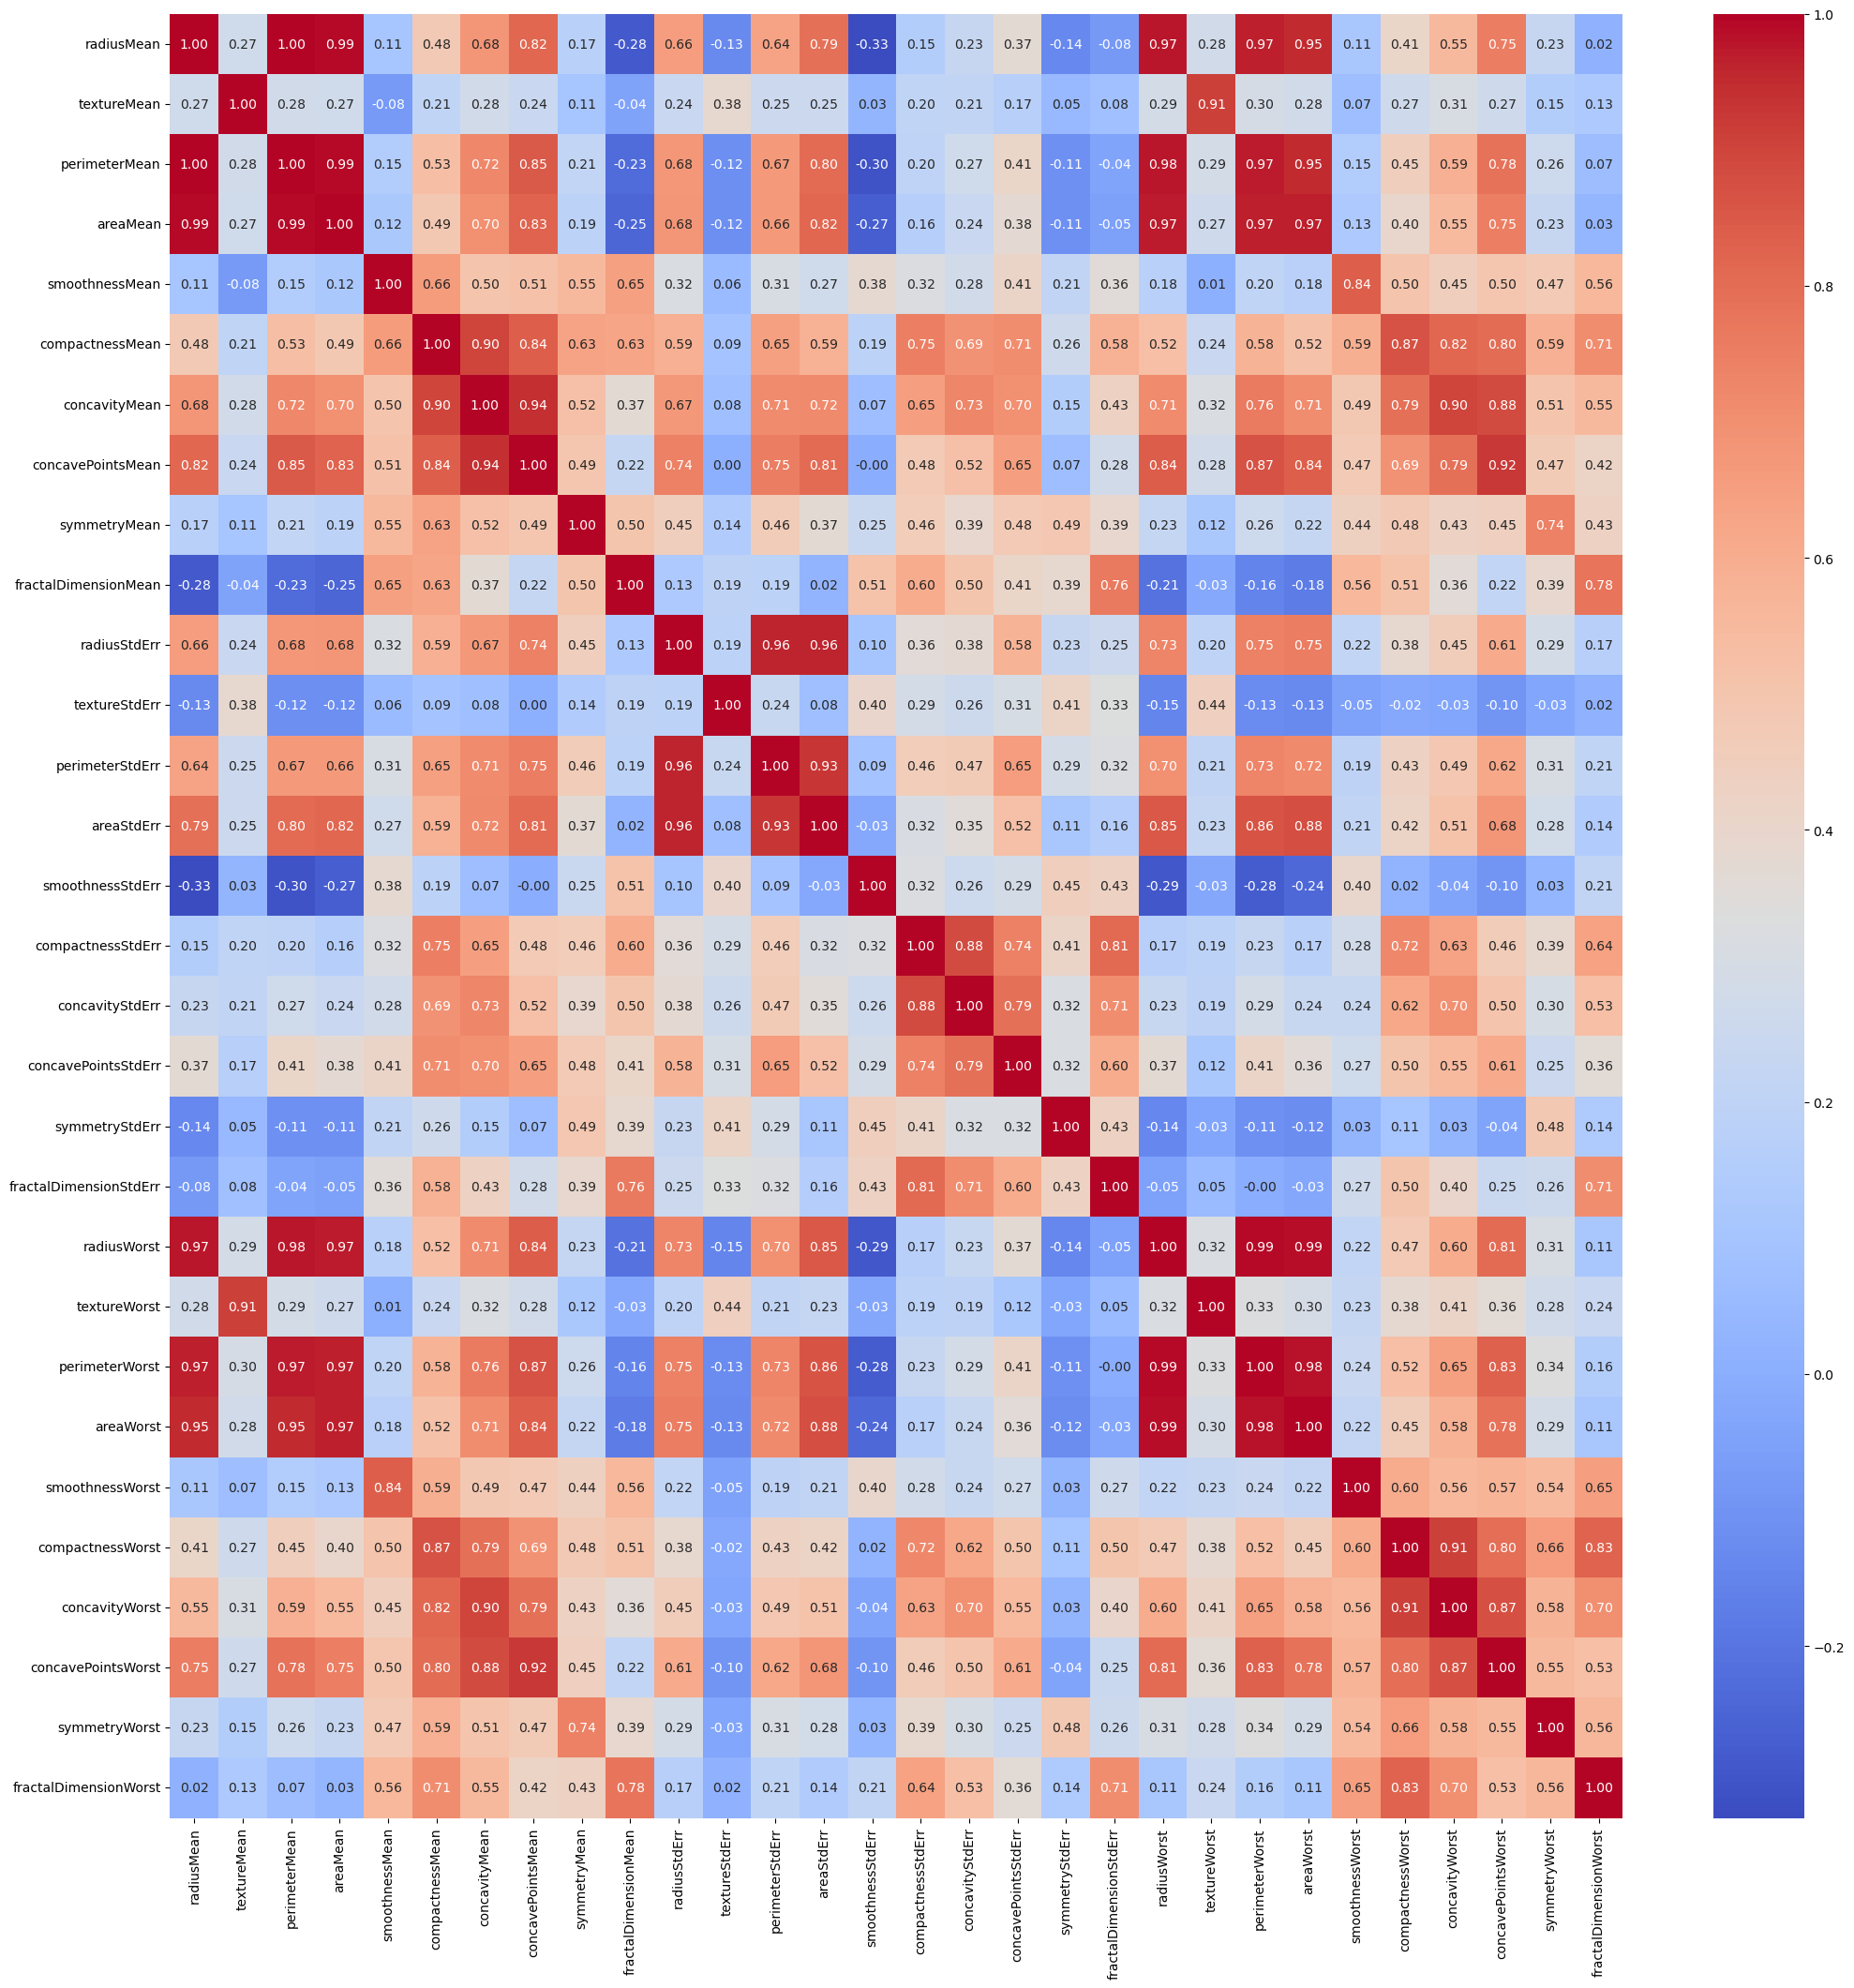

In [717]:
# from the heatmap it is seen that some variables have high correlation and we could exclude them
corr = df_correlation.corr(numeric_only=True)
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [718]:
df_train_upd = df_train.copy()
df_train_upd_y = df_train_upd['class']
df_train_upd = df_train_upd.drop(['ID', 'class'], axis = 1)

In [719]:
# Remove highly correlated features with >0.9

threshold = 0.9

drop_columns = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            drop_columns.add(colname)

df_train_upd = df_train_upd.drop(columns=drop_columns)
print(f"Highly correlated features: {drop_columns}")

Highly correlated features: {'perimeterStdErr', 'concavePointsWorst', 'perimeterWorst', 'concavityWorst', 'perimeterMean', 'areaMean', 'areaWorst', 'concavePointsMean', 'radiusWorst', 'areaStdErr', 'textureWorst'}


In [720]:
df_train_upd.columns

Index(['radiusMean', 'textureMean', 'smoothnessMean', 'compactnessMean',
       'concavityMean', 'symmetryMean', 'fractalDimensionMean', 'radiusStdErr',
       'textureStdErr', 'smoothnessStdErr', 'compactnessStdErr',
       'concavityStdErr', 'concavePointsStdErr', 'symmetryStdErr',
       'fractalDimensionStdErr', 'smoothnessWorst', 'compactnessWorst',
       'symmetryWorst', 'fractalDimensionWorst'],
      dtype='object')

In [721]:
df_test_upd = df_test.copy()
df_test_upd = df_test.drop(['ID','perimeterStdErr', 'concavePointsWorst', 'perimeterWorst', 'concavityWorst', 
                            'areaMean', 'areaWorst', 'concavePointsMean', 'radiusWorst', 'areaStdErr', 'textureWorst'], axis=1)
df_test_upd.columns

Index(['radiusMean', 'textureMean', 'perimeterMean', 'smoothnessMean',
       'compactnessMean', 'concavityMean', 'symmetryMean',
       'fractalDimensionMean', 'radiusStdErr', 'textureStdErr',
       'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr',
       'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr',
       'smoothnessWorst', 'compactnessWorst', 'symmetryWorst',
       'fractalDimensionWorst'],
      dtype='object')

In [722]:
df_train_upd_scaler = pd.DataFrame(scaler.fit_transform(df_train_upd))
df_train_upd_scaler.columns = df_train_upd.columns

df_test_upd_scaler = pd.DataFrame(scaler.fit_transform(df_test_upd))
df_test_upd_scaler.columns = df_test_upd.columns

In [723]:
sm_x_upd,sm_y_upd = sm.fit_resample(df_train_upd_scaler, df_train_upd_y)

In [724]:
log_reg1 = LogisticRegression()
log_reg1.fit(sm_x_upd, sm_y_upd)
y_pred_log_reg1 = cross_val_predict(log_reg1, sm_x_upd, sm_y_upd, cv=50)

# Metrics to check the effectiveness of model
accuracy_log_reg1 = accuracy_score(sm_y_upd, y_pred_log_reg1)
precision_log_reg1 = precision_score(sm_y_upd, y_pred_log_reg1)
recall_log_reg1 = recall_score(sm_y_upd, y_pred_log_reg1)
f1_log_reg1 = f1_score(sm_y_upd, y_pred_log_reg1)
roc_auc_log_reg1 = roc_auc_score(sm_y_upd, y_pred_log_reg1)
confusion_log_reg1 = confusion_matrix(sm_y_upd, y_pred_log_reg1)

print('Accuracy Score:', accuracy_log_reg1)
print('Precision Score:', precision_log_reg1)
print('Recall:', recall_log_reg1)
print('f1_score:', f1_log_reg1)
print('roc_auc:', roc_auc_log_reg1)
confusion_log_reg1

Accuracy Score: 0.9867021276595744
Precision Score: 0.9893048128342246
Recall: 0.9840425531914894
f1_score: 0.9866666666666667
roc_auc: 0.9867021276595744


array([[186,   2],
       [  3, 185]])